# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import kagglehub
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. **Memahami Struktur Data**

**Tinjau jumlah baris dan kolom dalam dataset.**  

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Data terdiri dari 2512 baris dan 16 kolom 
- **TransactionID**: Pengidentifikasi alfanumerik unik untuk setiap transaksi.
- **AccountID**: Pengidentifikasi unik untuk setiap akun, dengan beberapa transaksi per akun.
- **TransactionAmount**: Nilai moneter setiap transaksi, mulai dari pengeluaran kecil sehari-hari hingga pembelian yang lebih besar.
- **TransactionDate**: Cap waktu setiap transaksi, yang mencatat tanggal dan waktu.
- **TransactionType**: Bidang kategoris yang menunjukkan transaksi 'Kredit' atau 'Debit'.
- **Location**: Lokasi geografis transaksi, diwakili oleh nama kota di AS.
- **DeviceID**: Pengidentifikasi alfanumerik untuk perangkat yang digunakan untuk melakukan transaksi.
- **IP Address** : Alamat IPv4 yang terkait dengan transaksi, dengan perubahan sesekali untuk beberapa akun.
- **MerchantID**: Pengidentifikasi unik untuk pedagang, yang menunjukkan pedagang pilihan dan pedagang outlier untuk setiap akun.
- **Channel**: Saluran tempat transaksi dilakukan (misalnya, Online, ATM, Cabang).
- **CustomerAge**: Usia pemegang akun, dengan pengelompokan logis berdasarkan pekerjaan.
- **CustomerOccupation**: Pekerjaan pemegang akun (misalnya, Dokter, Insinyur, Mahasiswa, Pensiunan), yang mencerminkan pola pendapatan.
- **PreviousTransactionDate**: Cap waktu transaksi terakhir untuk akun, membantu dalam menghitung frekuensi transaksi.
- **LoginAttempts**: Jumlah upaya login sebelum transaksi, dengan nilai yang lebih tinggi menunjukkan potensi anomali.
- **AccountBalance**: Saldo di akun pascatransaksi, dengan korelasi logis berdasarkan jenis dan jumlah transaksi.
- **TransactionDuration**: Durasi transaksi dalam hitungan detik, bervariasi menurut jenis transaksi.


**Tinjau jenis data di setiap kolom (numerikal atau kategorikal).**

In [429]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)
    else:
        num.append(col)
        
# Menampilkan jumlah dan nama kolom untuk masing-masing tipe data
print(f"Jumlah kolom kategorikal: {len(cat)}")
print(f"Kolom kategorikal: {cat}\n")

print(f"Jumlah kolom numerikal: {len(num)}")
print(f"Kolom numerikal: {num}")

Jumlah kolom kategorikal: 11
Kolom kategorikal: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']

Jumlah kolom numerikal: 5
Kolom numerikal: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


In [430]:
# Mengubah type data
date_columns = ['TransactionDate', 'PreviousTransactionDate']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [431]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"])

df["DaysBetweenTransaction"] = (df["PreviousTransactionDate"] - df["TransactionDate"]).dt.days

In [432]:
print(f'Channel unique values: {df["Channel"].unique()}')
print(f'Customer Ocupation values: {df["CustomerOccupation"].unique()}')
print(f'Transaction Type values: {df["TransactionType"].unique()}')

Channel unique values: ['ATM' 'Online' 'Branch']
Customer Ocupation values: ['Doctor' 'Student' 'Retired' 'Engineer']
Transaction Type values: ['Debit' 'Credit']


## 2. **Menangani Data yang Hilang**  

**Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.**

In [433]:
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
DaysBetweenTransaction     0
dtype: int64

Tidak ada data yang hilang

In [434]:
# Memfilter isi kolom yang memiliki 0 values
zero_columns = df.columns[(df == 0).any(axis=0)]
print(zero_columns)

Index([], dtype='object')


Tidak ada kolom yang memiliki 0 values

## 3. **Analisis Distribusi dan Korelasi** 

**Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.**

In [435]:
df.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DaysBetweenTransaction
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512,2512.000000
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024,486.857882
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23,307.000000
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53,394.000000
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22,485.000000
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872,580.000000
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23,671.000000
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN,106.378910


Deskripsi Statistik Transaksi

Dataset ini berisi 2.512 transaksi, dengan berbagai informasi terkait nilai transaksi, tanggal, usia pelanggan, durasi transaksi, jumlah percobaan login, saldo akun, dan tanggal transaksi sebelumnya.

1. **TransactionAmount** (Jumlah Transaksi)
Rata-rata transaksi sebesar $297.59, dengan nilai minimum $0.26 dan maksimum $1.919,11.
Sebagian besar transaksi berada dalam rentang $81.89 (Q1) hingga $414.53 (Q3), menunjukkan adanya distribusi transaksi yang cukup bervariasi.
Standar deviasi sebesar $291.95, yang menunjukkan adanya variasi besar dalam jumlah transaksi.
2. **TransactionDate** (Tanggal Transaksi)
Dataset mencakup transaksi dari 2 Januari 2023 hingga 1 Januari 2024.
Rata-rata waktu transaksi berada di sekitar 5 Juli 2023, yang dapat menunjukkan periode transaksi yang lebih aktif.
3. **CustomerAge** (Usia Pelanggan)
Rata-rata usia pelanggan adalah 44.67 tahun, dengan rentang usia 18 hingga 80 tahun.
Sebagian besar pelanggan berada dalam rentang usia 27 tahun (Q1) hingga 59 tahun (Q3).
Distribusi usia menunjukkan variasi yang luas, dengan standar deviasi 17.79 tahun.
4. **TransactionDuration** (Durasi Transaksi dalam Detik)
Durasi transaksi rata-rata adalah 119.64 detik.
Transaksi tercepat hanya membutuhkan 10 detik, sementara transaksi terlama memakan waktu hingga 300 detik.
Sebagian besar transaksi berlangsung antara 63 detik (Q1) hingga 161 detik (Q3).
5. **LoginAttempts** (Percobaan Login Sebelum Transaksi)
Mayoritas pelanggan melakukan transaksi dengan hanya 1 kali percobaan login.
Rata-rata percobaan login sebelum transaksi adalah 1.12 kali, dengan maksimum 5 kali percobaan.
Nilai ini bisa menjadi indikator kemungkinan adanya anomali atau upaya login yang mencurigakan.
6. **AccountBalance** (Saldo Akun Setelah Transaksi)
Saldo rata-rata setelah transaksi adalah $5.114,30, dengan saldo terendah $101,25 dan saldo tertinggi $14.977,99.
Sebagian besar saldo akun pelanggan berada dalam rentang $1.504,37 (Q1) hingga $7.678,82 (Q3).
Standar deviasi $3.900,94, menunjukkan perbedaan saldo yang cukup signifikan antar pelanggan.
7. **PreviousTransactionDate** (Tanggal Transaksi Sebelumnya)
Rata-rata waktu transaksi sebelumnya terjadi pada 4 November 2024, yang mungkin menunjukkan bahwa pelanggan memiliki pola transaksi yang berulang dalam periode tertentu.


In [436]:
def plot_histogram_and_boxplot(df, columns=None, bins=30):
    
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns
    
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 5 * num_cols))
    for i, col in enumerate(columns):
        
        sns.histplot(df[col], bins=bins, kde=True, ax=axes[i, 0], color="blue")
        axes[i, 0].set_title(f'Histogram of {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Frequency')
        
        sns.boxplot(x=df[col], ax=axes[i, 1], color="red")
        axes[i, 1].set_title(f'Boxplot of {col}')
        axes[i, 1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

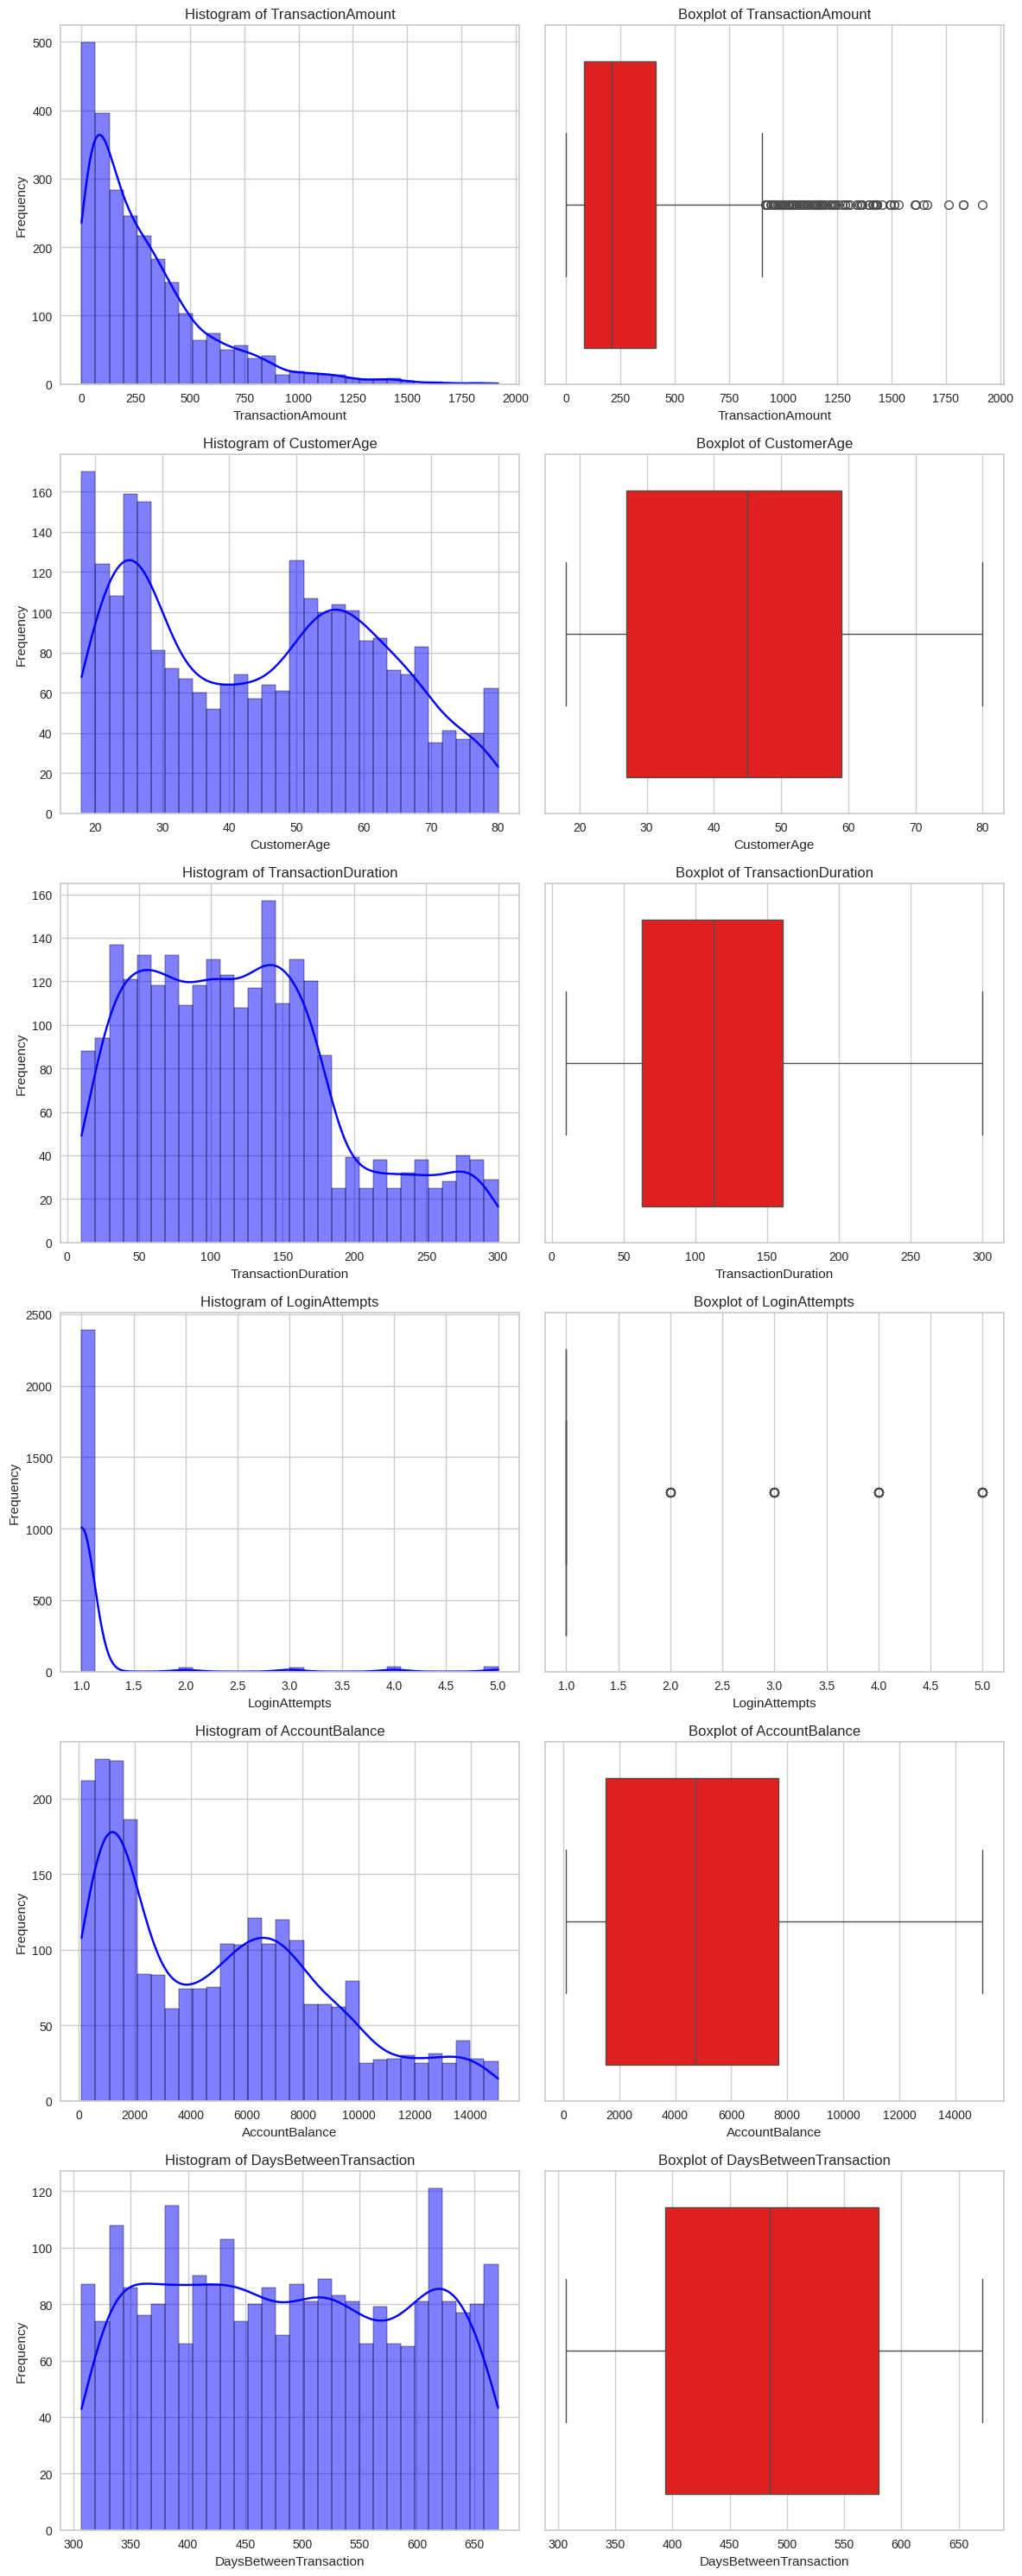

In [437]:
plot_histogram_and_boxplot(df)

**Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.**

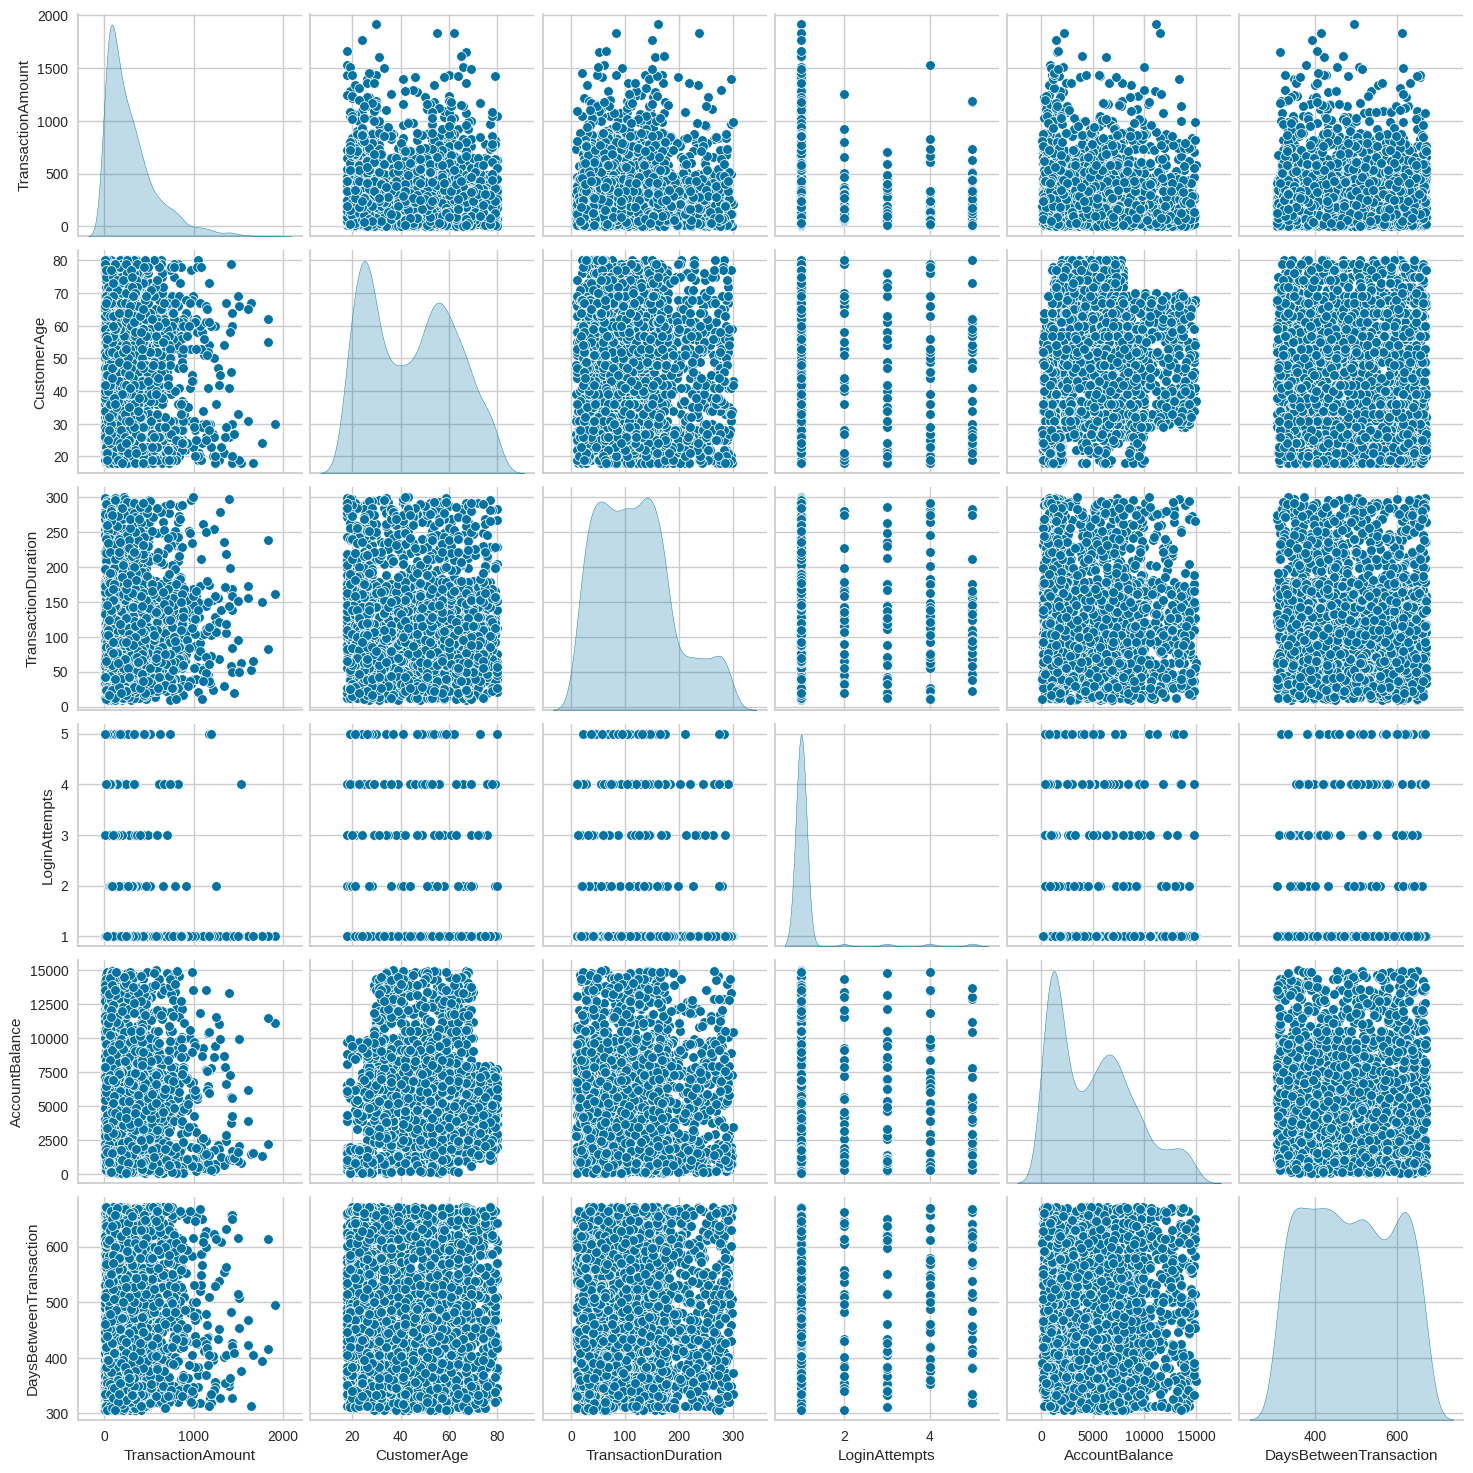

In [438]:
def plot_pairwise_scatter(df, columns=None):
    """
    Membuat scatter plot (pairplot) untuk melihat hubungan antara variabel numerik.
    
    Parameters:
    df (DataFrame): Dataframe yang berisi data.
    columns (list, optional): Daftar kolom yang ingin divisualisasikan. Jika None, maka semua kolom numerik akan digunakan.
    """
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Ambil semua kolom numerik

    sns.pairplot(df[columns], diag_kind="kde")  # Gunakan KDE untuk distribusi di diagonal
    plt.show()

# Contoh penggunaan:
plot_pairwise_scatter(df)

## 4. **Visualisasi Data**  


**Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.**

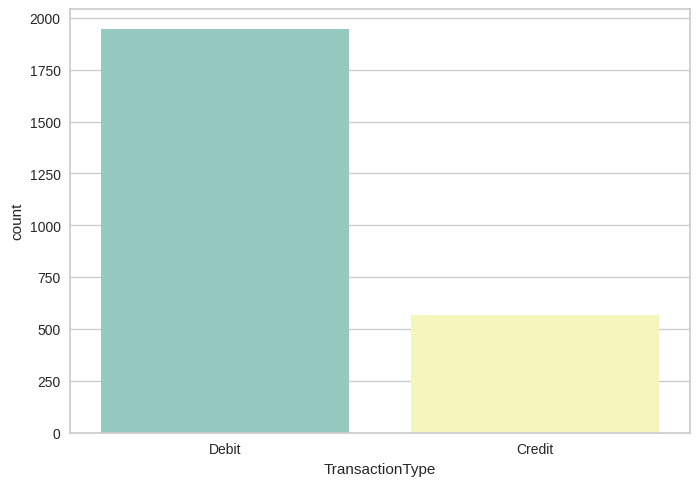

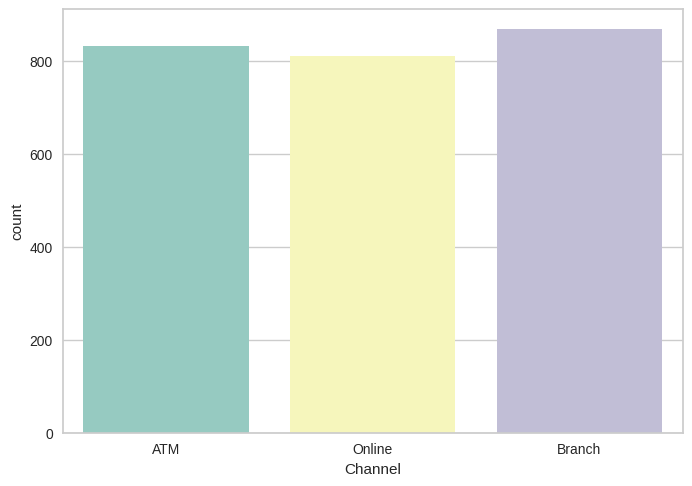

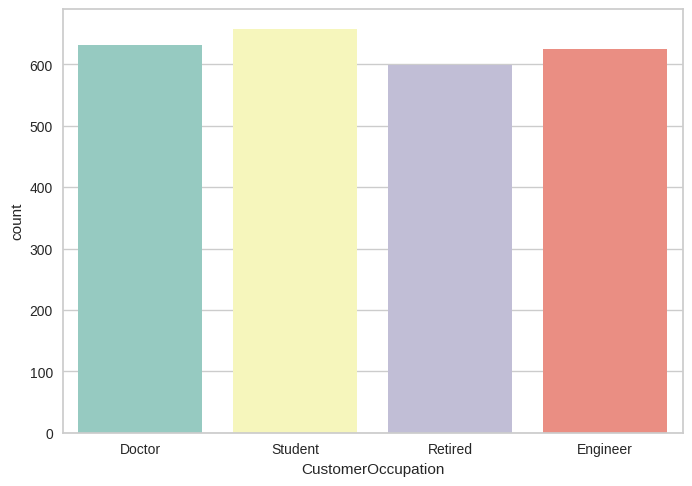

In [439]:
categorical = ['TransactionType', 'Channel', 'CustomerOccupation']

for categoru in categorical:
    # Membuat diagram batang
    sns.countplot(data=df, x=categoru, palette="Set3")
    plt.show()

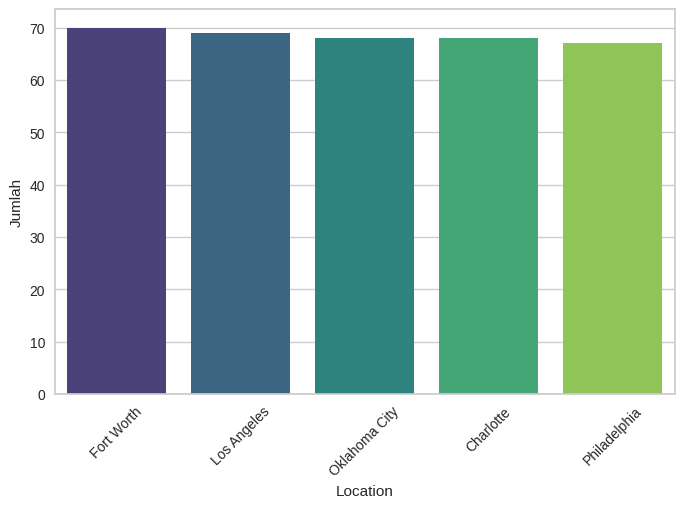

In [440]:
top5 = df['Location'].value_counts().nlargest(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top5.index, y=top5.values, palette="viridis")    
plt.ylabel("Jumlah")
plt.xticks(rotation=45)  # Rotasi label jika perlu
plt.show()

**Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.**

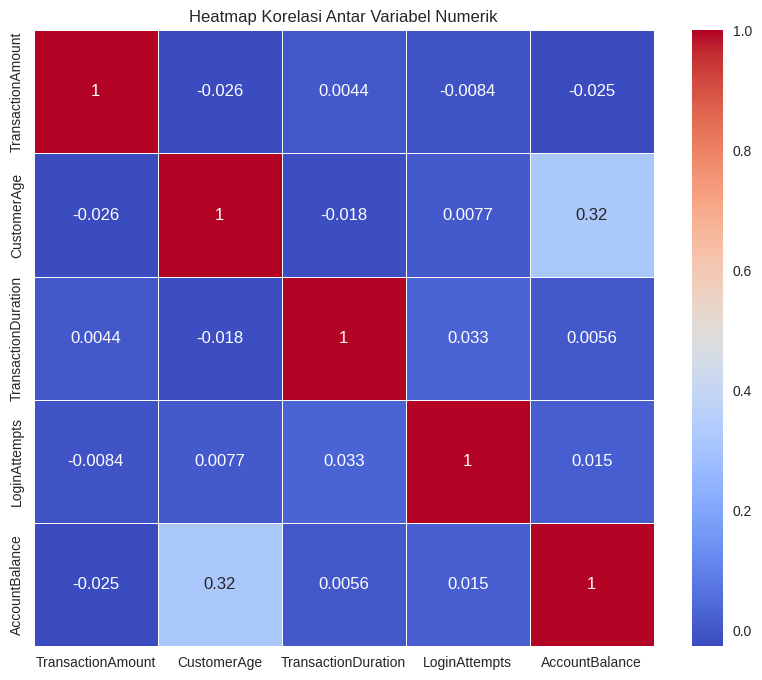

In [441]:
def plot_correlation_heatmap(df, num_cols):
    plt.figure(figsize=(10, 8))
    corr = df[num_cols].corr()  # Menghitung korelasi hanya untuk kolom numerik
    sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap Korelasi Antar Variabel Numerik")
    plt.show()

plot_correlation_heatmap(df, num)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [442]:
features = ['AccountBalance', 'CustomerAge']
features

['AccountBalance', 'CustomerAge']

In [443]:
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
X

array([[-5.36635052e-04,  1.42371826e+00],
       [ 2.21647159e+00,  1.31128706e+00],
       [-1.02353413e+00, -1.44327736e+00],
       ...,
       [-4.43928023e-01,  6.36699859e-01],
       [-8.55705373e-01, -1.21841495e+00],
       [-1.27765152e+00, -1.16219935e+00]])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

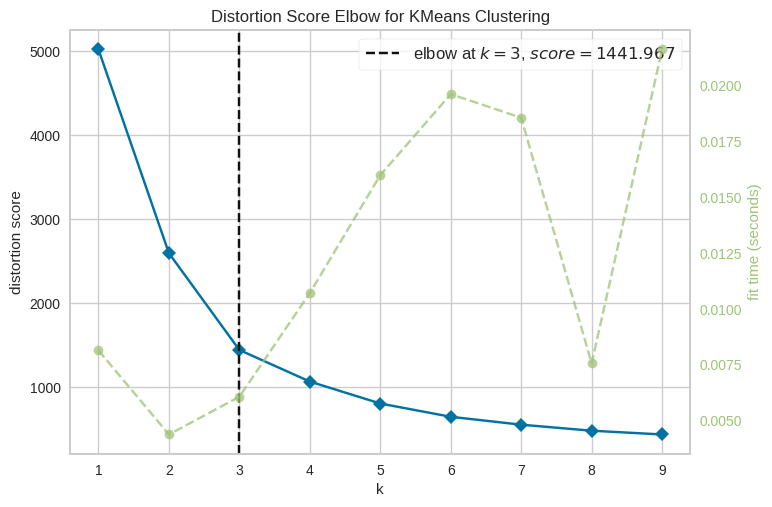

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [444]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [445]:
kmeans = KMeans(n_clusters=3, random_state=0)
cluster = kmeans.fit(X)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [446]:
score = silhouette_score(X, cluster.labels_)
print("Silhouette_score: ", score)

Silhouette_score:  0.4852992531925467


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

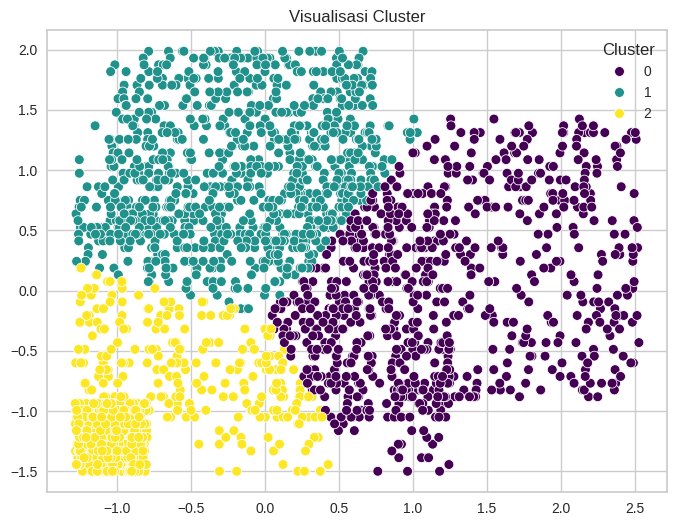

In [447]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, palette='viridis', s=50)
plt.title('Visualisasi Cluster')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [448]:
df['Cluster'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [449]:
df[features] = scaler.inverse_transform(X)

In [450]:
df_final = df[['AccountBalance', 'CustomerAge', 'Cluster']]
df_final

,AccountBalance,CustomerAge,Cluster
0,5112.21,70.0,1
1,13758.91,68.0,0
2,1122.35,19.0,2
3,8569.06,26.0,0
4,7429.40,26.0,0
...,...,...,...
2507,12690.79,33.0,0
2508,254.75,48.0,2
2509,3382.91,56.0,1
2510,1776.91,23.0,2


In [453]:
df_final['Cluster'] = df_final['Cluster'].replace({0: 1, 1: 2, 2: 3})

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [456]:
df_final.groupby('Cluster')[['AccountBalance', 'CustomerAge']].mean().round(2)

,AccountBalance,CustomerAge
Cluster,,
1,9788.41,44.62
2,4383.11,62.06
3,1659.97,26.01


1. Cluster 1: Klaster ini terdiri dari pelanggan dengan saldo akun tertinggi dan usia menengah. Mereka kemungkinan adalah individu yang sudah mapan secara finansial, memiliki pengelolaan keuangan yang baik, dan cenderung melakukan transaksi dengan jumlah besar secara rutin.

2. Cluster 2: Kelompok ini mewakili pelanggan dengan saldo akun menengah dan usia yang lebih tua. Mereka mungkin mendekati masa pensiun atau sudah pensiun, dengan pola transaksi yang lebih stabil dan berhati-hati dalam pengeluaran.

3. Cluster 3: Kelompok ini terdiri dari pelanggan muda dengan saldo akun terendah. Mereka mungkin berada dalam tahap awal karir, dengan pengeluaran lebih besar dibanding pemasukan, dan cenderung melakukan transaksi dalam jumlah yang lebih kecil dan lebih sering.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1️⃣
- **Rata-rata saldo akun:** 9,788.41
- **Rata-rata usia pelanggan:** 44.62 tahun
- **Interpretasi:** Pelanggan dalam Cluster 1 memiliki saldo akun yang paling tinggi dibandingkan cluster lain. Mereka juga berada pada usia paruh baya (mid-age), sekitar 44 tahun, yang mungkin menunjukkan pelanggan dengan stabilitas finansial lebih baik, kemungkinan dari kelompok profesional mapan atau individu dengan pengelolaan keuangan yang baik.

## Cluster 2️⃣
- **Rata-rata saldo akun:** 4,383.11
- **Rata-rata usia pelanggan:** 62.06 tahun
- **Interpretasi:** Pelanggan dalam Cluster 2 memiliki saldo akun menengah, lebih rendah dari Cluster 1 tetapi lebih tinggi dari Cluster 3. Usia rata-rata 62 tahun menunjukkan bahwa pelanggan ini kemungkinan sudah memasuki masa pensiun atau mendekati akhir karirnya. Mereka mungkin lebih berhati-hati dalam membelanjakan uang dan lebih fokus pada tabungan atau investasi jangka panjang.

## Cluster 3️⃣
- **Rata-rata saldo akun:** 1,659.97
- **Rata-rata usia pelanggan:** 26.01 tahun
- **Interpretasi:** Pelanggan dalam Cluster 3 memiliki saldo akun terendah. Dengan rata-rata usia 26 tahun, mereka kemungkinan masih dalam awal karir, mungkin baru lulus kuliah atau baru mulai bekerja. Mereka mungkin memiliki pengeluaran yang lebih besar dibandingkan pemasukan, atau masih dalam tahap membangun kestabilan finansial.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [458]:
df_final['Cluster'] = df_final['Cluster'].replace({1: 'stabil', 2:'menengah', 3:'rendah'})
df_final.rename(columns={'Cluster': 'TingkatSejahtera'}, inplace=True)

In [459]:
df_final.to_csv('data_clustering.csv', index=False)